In [1]:
#Imports

import warnings
warnings.simplefilter('ignore')

# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
from keras_tqdm import TQDMNotebookCallback

import nilearn
from nilearn import plotting
from nilearn import image
from nilearn import datasets
from nilearn.decomposition import CanICA
from nilearn.input_data import NiftiMasker
from nilearn import image
from nilearn.plotting import plot_stat_map, show

Using TensorFlow backend.
/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
# Load Dataset
dataset = nilearn.datasets.fetch_cobre(n_subjects=146, data_dir="/Users/KJP/Desktop/neural nets/Cobre Dataset2", url=None, verbose=1)
file_paths = dataset["func"]
confounds = dataset["confounds"]
file_paths.sort() #sort file names by alphabetical order, which will result in sorting by patient number
confounds.sort()
del file_paths[74]                           # number 74 is misisng samples so it needs to be removed
del confounds[74]

/anaconda3/lib/python3.6/site-packages/nilearn/datasets/func.py:1635: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/4197885' mode='r' encoding='UTF-8'>
  files = json.load(open(files, 'r'))
/anaconda3/lib/python3.6/site-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/anaconda3/lib/python3.6/site-packages/nilearn/datasets/func.py:1717: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/keys_confounds.json' mode='r' encoding='UTF-8'>
  files_keys_con = open(csv_keys_con, 'r').read()
/anaconda3/lib/python3.6/site-packages/nilearn/datasets/func.py:1718: ResourceWarning: unclosed file <_io.TextIOWrapper name='/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/keys_phenotypic_data.json' mode='

In [3]:
#This cell performs group spatial ica decomposition on the dataset. It narrows it down to the top 
#100 components.
from nilearn.decomposition import CanICA

canica = CanICA(n_components=100, smoothing_fwhm=10.,
                threshold=3., verbose=10, random_state=0)
canica.fit(file_paths)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
#components_img.to_filename('canica_resting_state.nii.gz')

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[MultiNiftiMasker.fit] Loading data from [/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040000.nii.gz, /Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040001.nii.gz, /Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/f
[MultiNiftiMasker.fit] Computing mask


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:   22.1s finished


[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040000.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040001.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040002.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040025.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040026.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040027.nii.gz')
[MultiNiftiMasker.transform_single_imgs] 

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040049.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040050.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040051.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning e

[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040076.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040077.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040078.nii.gz')
[MultiNiftiMasker.transform_single_imgs] 

[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040101.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040102.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040103.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extractin

[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040125.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040126.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/Users/KJP/Desktop/neural nets/Cobre Dataset2/cobre/fmri_0040127.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning e

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   10.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   15.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   17.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   19.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   22.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   24.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   27.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   29.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   31.9s finished
/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the futur

/anaconda3/lib/python3.6/site-packages/scipy/ndimage/measurements.py:272: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  return _nd_image.find_objects(input, max_label)
/anaconda3/lib/python3.6/site-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


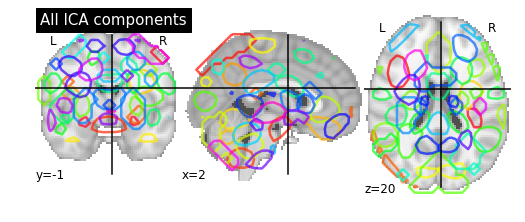

In [4]:
#Visualize the ica spatial components
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(components_img, title='All ICA components')

In [5]:
# Transform files to their ica components
component_files = canica.transform(file_paths)

In [6]:
# Convert from list to np array
component_files = np.array(component_files)

In [80]:
# Make training and testing input vectors
XData = component_files
YData = np.load('/Users/KJP/Desktop/neural nets/Codes/YData.npy')
XData -= XData.mean()
XData /= XData.max()
x_train = XData[:115]       #[1:143:2]  these commented out are other options to split data 50 50
x_test = XData[115:]         #[0:144:2]
y_train = YData[:115]         #[1:143:2]
y_test = YData[115:]          #[0:144:2]
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])
display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

In [101]:
input_dim=15000
output_dim=2
# Multi-layer net with ReLU hidden layer
model = keras.models.Sequential()
# Here we make the hidden layer (size 2) with a ReL
# activation function, but also initialize the bias
# weights in the network to a constant 0.1
model.add(keras.layers.Dropout(0.2, input_shape=(input_dim,)))
model.add(keras.layers.Dense(1000,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(500,input_dim=input_dim,activation='relu',
                            bias_initializer=keras.initializers.Constant(0.1)))
model.add(keras.layers.Dropout(0.1))
model.add(keras.layers.Dense(100,activation='relu', bias_initializer=keras.initializers.Constant(0.1)))


# Output layer (size 1), sigmoid activation function
model.add(keras.layers.Dense(output_dim,activation='softmax'))
# Compile as above (default learning rate and other
# hyperparameters for the Adam optimizer).
model.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adam(lr=0.00002), metrics=['accuracy'])
# Display the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_63 (Dropout)         (None, 15000)             0         
_________________________________________________________________
dense_85 (Dense)             (None, 1000)              15001000  
_________________________________________________________________
dropout_64 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_86 (Dense)             (None, 500)               500500    
_________________________________________________________________
dropout_65 (Dropout)         (None, 500)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 100)               50100     
_________________________________________________________________
dense_88 (Dense)             (None, 2)                 202       
Total para

In [102]:
batch_size = 100
epochs = 150
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[TQDMNotebookCallback()])

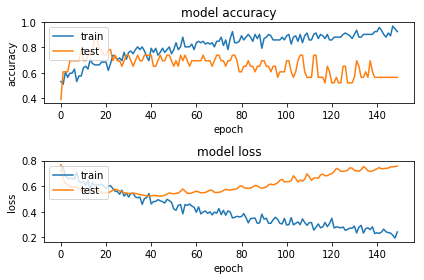

In [103]:
plt.figure()
# summarize history for accuracy
plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
# summarize history for loss
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.tight_layout()
plt.show()

In [104]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.882283091545105
Test accuracy: 0.699999988079071
